# Sampling from Distributions, Bar Plots, Histograms and Scatter plots

## Import and Settings

We will import `NumPy` and `matplotlib`. In addition, we will also start with some customised layout for the plot.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng(seed = 42)

## Sampling and Plotting

`NumPy` provides a utility to generate pseudo-random numbers. We shall try to sample points from various distributions. Once we have a sample, we can then represent it pictorially using suitable plots.

### Sampling: Bernoulli

Let us generate a sample of $1000$ points from the $\text{Br}(0.7)$.

In `NumPy`:

In [44]:
X = rng.choice([0, 1], p = [0.3, 0.7], size = 1000)
X.shape

(1000,)

### Plotting: Bar plot

Let us visualise the sample using a bar plot. For this, we first need the height of the bars.

In [45]:
zero, one = 0, 0
for i in range(X.shape[0]):
    if X[i] == 0:
        zero += 1
    else:
        one += 1

There is a better way of getting the height of the bars. We will learn this when we study advanced indexing.

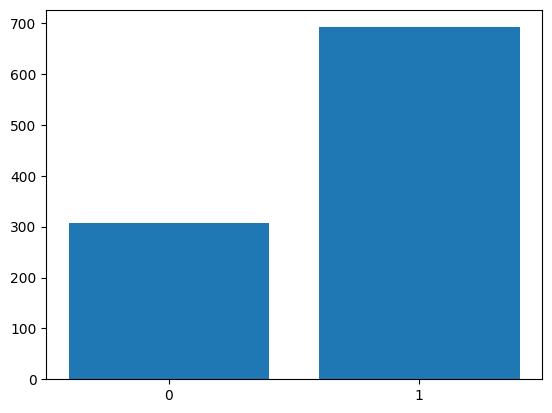

In [46]:
plt.bar([0, 1], [zero, one])
plt.xticks([0, 1]);

### Sampling: Gaussian

We now generate a sample of $10,000$ points from $\mathcal{N}(1, 4)$. Recall that $\mu = 1$ and $\sigma^2 = 4$.

In [47]:
X = rng.normal(1, 2, size = 10_000)
X.shape

(10000,)

### Plotting: Histogram

We can now visualise the sample using a histogram.

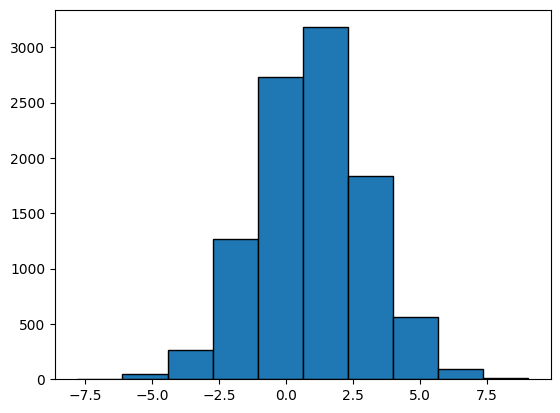

In [48]:
plt.hist(X, bins = 10, edgecolor = 'black');

### Sampling: Bivariate Gaussian

Sample 1000 points from the following Bivariate Gaussian:

$$
\mathcal{N} \left( \begin{bmatrix}1 \\ 2\end{bmatrix}, \begin{bmatrix}1 & 0\\0 & 5\end{bmatrix} \right)
$$

In [49]:
mu = np.array([1, 2])
cov = np.array([
    [1, 0],
    [0, 5]
])
X = rng.multivariate_normal(mu, cov, size = 1000).T
# we transpose so that the data-matrix is (d, n) and not (n, d)
d, n = X.shape

### Plotting: Scatter plot

Let us now visualise the sample using a scatter plot. Zooming out of the scatter plot gives us a better understanding. Changing the covariance matrix also helps in understanding how the sampled points depend on it.

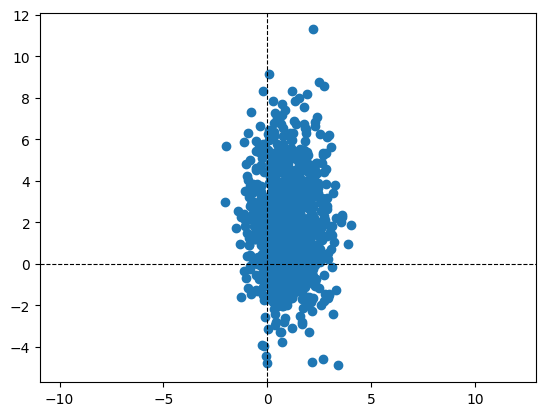

In [50]:
plt.scatter(X[0], X[1])
plt.axis('equal')
plt.axhline(color = 'black', linestyle = '--', linewidth = '0.8')
plt.axvline(color = 'black', linestyle = '--', linewidth = '0.8')

### Estimating the sample covariance matrix

Let us now estimate the sample covariance matrix and verify if it is close to the population covariance matrix. For this, we use extend the concept of a norm to matrices.

In [51]:
d, n = X.shape
mu = X.mean(axis = 1).reshape(d, 1)
C = (X - mu) @ (X - mu).T / n
C

array([[ 0.93985785, -0.03385001],
       [-0.03385001,  5.12296728]])

In [52]:
# Check how close C and cov are
np.linalg.norm(C - cov)

0.1450161250795069

#### Study: Sample covariance vs Population covariance

As an exercise, let us vary the number of data-points and notice the effect it has on the value of the norm computed above. We expect the norm to be smaller as the dataset's size increases. We perform the following steps:

- A function that generates the dataset for a given size.
- A function that uses the generated dataset to compute thee sample covariance matrix.

In [53]:
def generate(mu, cov, n):
    X = rng.multivariate_normal(mu, cov, size = n).T
    return X

def sample_covariance(X):
    d, n = X.shape
    mu = X.mean(axis = 1).reshape(d, 1)
    X -= mu
    return X @ X.T / n

We now run this for different values of the dataset size, $n$. For each $n$, we run the experiment $T$ times and then average the norm. We then plot the norm versus the value of $n$

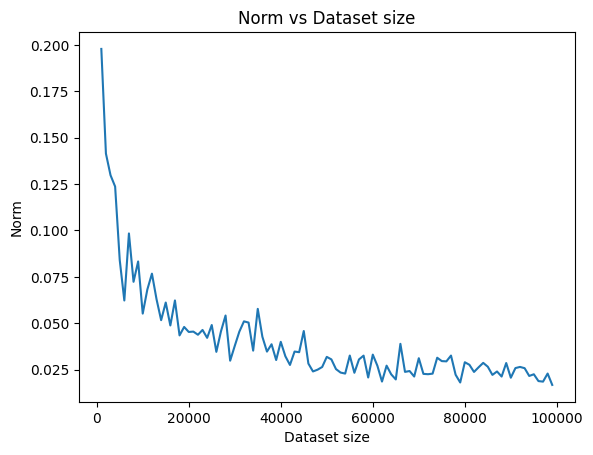

In [57]:
mu = np.array([1, 2])
# population covariance matrix
cov = np.array([
    [1, 0],
    [0, 5]
])

# Run experiment
T = 10 # number of runs for each n
norms = [ ]
n_vals = np.arange(1000, 100_000, 1000)
for n in n_vals:
    norm = 0
    for t in range(T):
        X = generate(mu, cov, n)
        C = sample_covariance(X)
        norm += np.linalg.norm(C - cov)
    norms.append(norm / T)

# Plot
plt.plot(n_vals, norms)
plt.title('Norm vs Dataset size')
plt.xlabel('Dataset size')
plt.ylabel('Norm');

We see how the norm keeps going down as the dataset's size keeps growing. This confirms our belief that the sample covariance matrix becomes a more accurate estimate of the population covariance matrix as the dataset's size increases.

## GMM

Let us now draw $1,000,000$ samples from a Gaussian Mixture Model (GMM) that has three components, with mixture probabilities $[0.2, 0.3, 0.5]$ and means $[0, 5, 10]$. The standard deviation of all three Gaussians is the same and is equal to $1$. We can visualise the sample using a histogram.

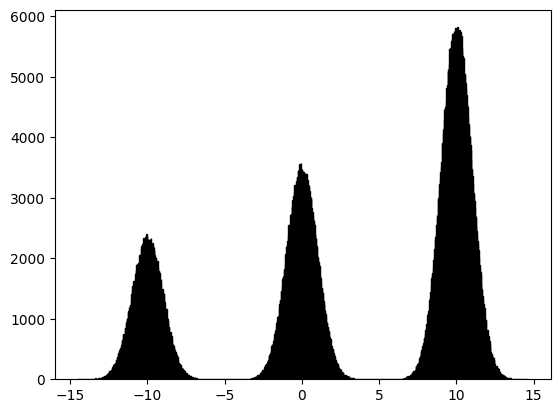

In [55]:
n = 1_000_000
comp = rng.choice([0, 1, 2], p = [0.2, 0.3, 0.5], size = n)
mu = np.array([-10, 0, 10])
X = np.zeros(n)
for i in range(n):
    X[i] = rng.normal(mu[comp[i]], 1)
plt.hist(X, bins = 1000, edgecolor = 'black');